In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("final_project_dataset.csv")
print(df.columns)

Index(['Dealer Code', 'Dealer Name', 'Plant Code', 'Plant Name',
       'Gate in Reference', 'Job Card Number', 'Service Category',
       'Service Type', 'Service Subtype', 'Creation Date', 'Closed Date',
       'Vehicle Sales Date', 'VIN Number', 'Vehicle Model', 'Variant Code',
       'License Plate Number', 'Point Of Contact name',
       'Point of contact Mobile', 'Customer Name', 'Customer Mobile',
       'Job Card Status', 'Mileage', 'Engine Hours', 'Invoice Number',
       'Exp Del Date & Time', 'Bill to', 'Paid Contribution',
       'Warranty Contribution', 'GW tech contribution',
       'GW tech special contribution', 'GW Commercial contribution',
       'GW Commercial special contribution', 'Dealer contribution',
       'Shortage contribution', 'Damage contribution', 'Job Description',
       'Item Number', 'Item Type', 'Material Group', 'Material Code',
       'Causal Part', 'Labour Code', 'Item Description', 'Quantity',
       'Target Quantity UoM', 'Split in Percent', 'Pa

C:\Users\Dell\AppData\Local\Temp\ipykernel_10532\2713404775.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_project_dataset.csv")


In [3]:
# Selecting relevant columns
columns_to_keep = ['Service Type','Creation Date','Vehicle Sales Date','Vehicle Model',
                'Mileage', 'Engine Hours','Bill to','Part Amount',
       'Labour Amount','Concern Code' ]

df = df[columns_to_keep]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59639 entries, 0 to 59638
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Service Type        59585 non-null  object 
 1   Creation Date       59639 non-null  object 
 2   Vehicle Sales Date  59542 non-null  object 
 3   Vehicle Model       59639 non-null  object 
 4   Mileage             59639 non-null  int64  
 5   Engine Hours        58993 non-null  float64
 6   Bill to             59639 non-null  object 
 7   Part Amount         59639 non-null  float64
 8   Labour Amount       59639 non-null  float64
 9   Concern Code        59301 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 4.6+ MB
None


In [4]:
# # Check missing values
# print(f"Missing values before cleaning:\n{df.isnull().sum()}")

In [5]:
# # Handle missing values
# df.dropna(subset=columns_to_keep, inplace=True)
# print(f"\nMissing values after cleaning:\n{df.isnull().sum()}")
# print(f"Shape after removing missing values: {df.shape}")

In [6]:
# # Convert date columns to datetime
# date_columns = ["Creation Date", "Vehicle Sales Date"]
# for col in date_columns:
#     df[col] = pd.to_datetime(df[col], errors='coerce')

In [7]:
# # Drop rows with invalid dates
# df.dropna(subset=date_columns, inplace=True)
# print(f"Shape after removing invalid dates: {df.shape}")

# # Feature Engineering - Extract more from dates
# df["year"] = df["Creation Date"].dt.year
# df["month"] = df["Creation Date"].dt.month
# df["day_of_week"] = df["Creation Date"].dt.dayofweek
# df["vehicle_age_days"] = (df["Creation Date"] - df["Vehicle Sales Date"]).dt.days

In [8]:

# Drop columns not in the list of columns to keep
df = df.drop(columns=[col for col in df.columns if col not in columns_to_keep])
print(df.columns)

Index(['Service Type', 'Creation Date', 'Vehicle Sales Date', 'Vehicle Model',
       'Mileage', 'Engine Hours', 'Bill to', 'Part Amount', 'Labour Amount',
       'Concern Code'],
      dtype='object')


In [9]:
# Checking missing values
print(df.isnull().sum())


Service Type           54
Creation Date           0
Vehicle Sales Date     97
Vehicle Model           0
Mileage                 0
Engine Hours          646
Bill to                 0
Part Amount             0
Labour Amount           0
Concern Code          338
dtype: int64


In [10]:
# Handling missing values

df.dropna(subset=columns_to_keep, inplace=True)  # Fixing inplace assignment issue
print(df.isnull().sum())
print(df.shape)

Service Type          0
Creation Date         0
Vehicle Sales Date    0
Vehicle Model         0
Mileage               0
Engine Hours          0
Bill to               0
Part Amount           0
Labour Amount         0
Concern Code          0
dtype: int64
(58539, 10)


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 58539 entries, 7 to 59638
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Service Type        58539 non-null  object 
 1   Creation Date       58539 non-null  object 
 2   Vehicle Sales Date  58539 non-null  object 
 3   Vehicle Model       58539 non-null  object 
 4   Mileage             58539 non-null  int64  
 5   Engine Hours        58539 non-null  float64
 6   Bill to             58539 non-null  object 
 7   Part Amount         58539 non-null  float64
 8   Labour Amount       58539 non-null  float64
 9   Concern Code        58539 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 4.9+ MB
None


In [12]:

# Separating numerical and categorical columns

cat_col = ['Service Type', 'Vehicle Model','Bill to', 'Concern Code']

num_col = ['Mileage', 'Engine Hours', 'Part Amount', 'Labour Amount']

date_columns = ["Creation Date", "Vehicle Sales Date"]


In [13]:
print(df[date_columns].dtypes)

Creation Date         object
Vehicle Sales Date    object
dtype: object


In [14]:
# Convert date columns to datetime

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Drop rows with NaT in any date column
df.dropna(subset=date_columns, inplace=True)

# Print updated data types
print(df[date_columns].dtypes)


Creation Date         datetime64[ns]
Vehicle Sales Date    datetime64[ns]
dtype: object


In [15]:
df["year"]=df["Creation Date"].dt.year
df["month"]=df["Creation Date"].dt.month

In [16]:

# Check for mixed data types in each column
mixed_columns = df.apply(lambda x: len(set(x.map(type))) > 1)

# Display columns with mixed data types
print(df.columns[mixed_columns].tolist())

[]


In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [18]:
# Label Encoding for 'Vehicle Model' & 'Concern Code'
label_encoders = {}
for col in ['Vehicle Model', 'Concern Code']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [19]:
# One-Hot Encoding for 'Service Type' & 'Bill to'
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_cols = one_hot_encoder.fit_transform(df[['Service Type', 'Bill to']])
ohe_df = pd.DataFrame(encoded_cols, columns=one_hot_encoder.get_feature_names_out(['Service Type', 'Bill to']))
print(ohe_df)

       Service Type_Breakdown  Service Type_PDI-2  \
0                         0.0                 0.0   
1                         0.0                 0.0   
2                         0.0                 0.0   
3                         0.0                 0.0   
4                         0.0                 0.0   
...                       ...                 ...   
58534                     1.0                 0.0   
58535                     1.0                 0.0   
58536                     1.0                 0.0   
58537                     1.0                 0.0   
58538                     1.0                 0.0   

       Service Type_Refurbuishment  Service Type_Running Repair  \
0                              0.0                          1.0   
1                              0.0                          1.0   
2                              0.0                          1.0   
3                              0.0                          1.0   
4                           

In [20]:
# Combine both
final_df = pd.concat([df.drop(columns=['Service Type', 'Bill to']), ohe_df], axis=1)

# Print the final DataFrame
#print(final_df)
df = final_df


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59637 entries, 7 to 57105
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Creation Date                   58539 non-null  datetime64[ns]
 1   Vehicle Sales Date              58539 non-null  datetime64[ns]
 2   Vehicle Model                   58539 non-null  float64       
 3   Mileage                         58539 non-null  float64       
 4   Engine Hours                    58539 non-null  float64       
 5   Part Amount                     58539 non-null  float64       
 6   Labour Amount                   58539 non-null  float64       
 7   Concern Code                    58539 non-null  float64       
 8   year                            58539 non-null  float64       
 9   month                           58539 non-null  float64       
 10  Service Type_Breakdown          58539 non-null  float64       
 11  Service

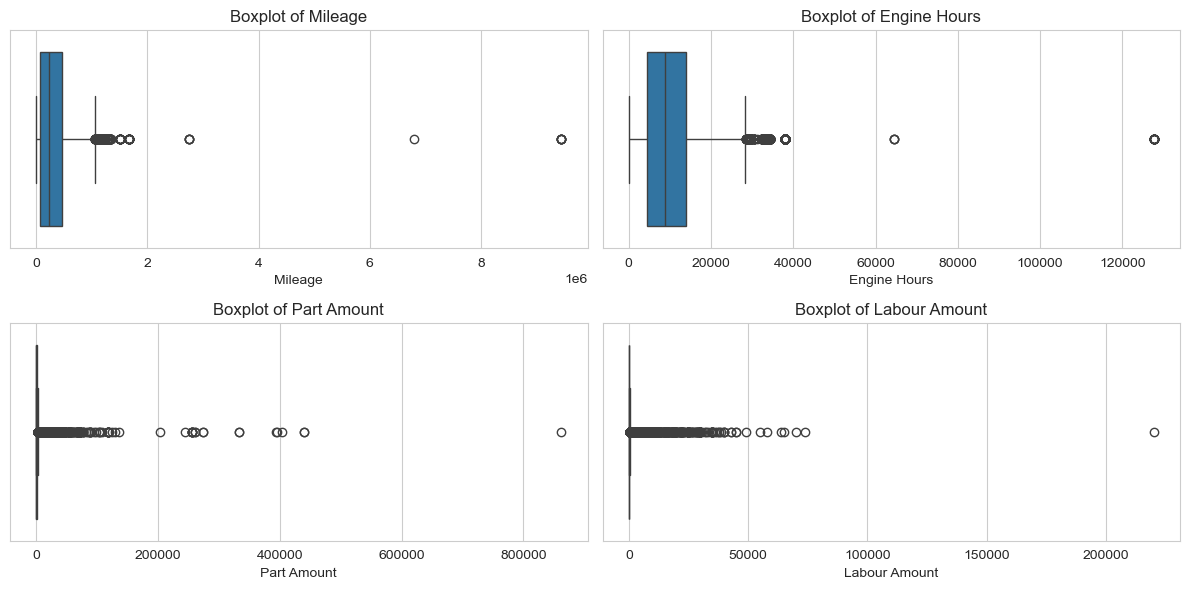

In [22]:
# Set plot style
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [23]:
# Outlier Detection using IQR
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [24]:
# Removing outliers
df = df[~((df[num_col] < lower_bound) | (df[num_col] > upper_bound)).any(axis=1)]

print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (42558, 22)


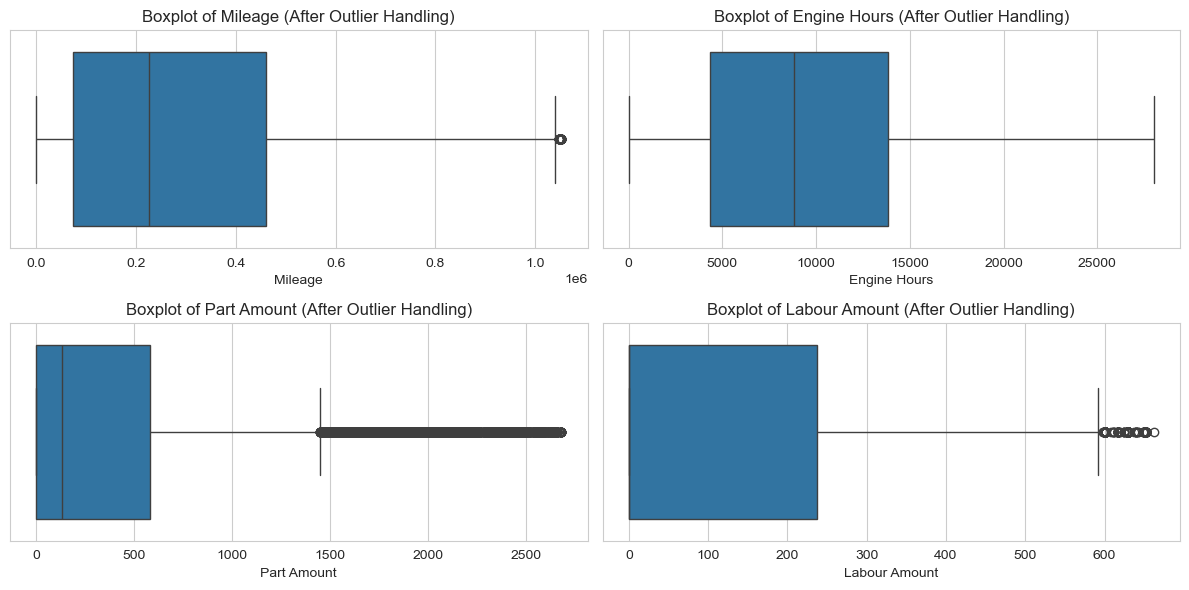

In [25]:
# Boxplot after outlier removal
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_col, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col} (After Outlier Handling)")

plt.tight_layout()
plt.show()

In [26]:
df = df.dropna()

In [27]:
from sklearn.model_selection import train_test_split
# Define features (X) and target variable (y)
X = df.drop(columns=["Labour Amount", "Creation Date", "Vehicle Sales Date"])  # Features
y = df["Labour Amount"]  # Target


In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32583, 19), (8146, 19), (32583,), (8146,))

In [29]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Feature Scaling Completed!")

Feature Scaling Completed!


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


In [31]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)


In [32]:
# Evaluate performance
r2 = r2_score(y_test, y_pred)

# Output results
print(r2)

0.20269569144674582
